In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
%matplotlib inline

#1. Import the required libraries and read the dataset. (1 point)

In [104]:
fifa_df=pd.read_csv('/Users/moni/Downloads/Dataset and relavant files - Python Project 1/fifa.csv')
fifa_df.head(5)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [105]:
fifa_var_df=pd.read_csv('/Users/moni/Downloads/Dataset and relavant files - Python Project 1/fifa_ variable_information.csv')
fifa_var_df

,ID,unique id for every player
0,Name,name
1,Age,age
2,Photo,url to the player's photo
3,Nationality,nationality
4,Flag,url to players's country flag
5,Overall,overall rating
6,Potential,potential rating
7,Club,current club
8,Club Logo,url to club logo
9,Value,current market value


#Check the first few samples, shape, info of the data and try to familiarize
#yourself with different features. (2 points)

In [106]:
fifa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 60 columns):
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null float64
Work Rate                   18159 non-null object
Body Type                   18159 non-null

In [107]:
fifa_df.shape

(18207, 60)

In [108]:
fifa_df.describe()

,ID,Age,Overall,Potential,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,214298.338606,25.122206,66.238699,71.307299,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,29965.244204,4.669943,6.908930,6.136496,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,16.000000,46.000000,48.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,200315.500000,21.000000,62.000000,67.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,221759.000000,25.000000,66.000000,71.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,236529.500000,28.000000,71.000000,75.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,246620.000000,45.000000,94.000000,95.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


#Drop the columns which you think redundant for the analysis. (1 point)


In [109]:
fifa_df.drop(['Photo','Flag','Club Logo'],axis=1, inplace=True)

#4. Convert the columns "Value", "Wage", "Release Clause" to float datatype
#after getting rid of currency symbol and suffix. (6 points)
#- Note: When the record/entry has "M"(indicates millions) as suffix you
#need to multiply that value with 1000000
#- When the record/entry has "K"(indicates thousands) as suffix you
#need to multiply that value with 1000

In [110]:
#inspect
fifa_df[['Value','Wage','Release Clause']]

,Value,Wage,Release Clause
0,€110.5M,€565K,€226.5M
1,€77M,€405K,€127.1M
2,€118.5M,€290K,€228.1M
3,€72M,€260K,€138.6M
4,€102M,€355K,€196.4M
5,€93M,€340K,€172.1M
6,€67M,€420K,€137.4M
7,€80M,€455K,€164M
8,€51M,€380K,€104.6M
9,€68M,€94K,€144.5M


In [111]:
def transform_val(curr_val):
    num_value= re.findall(r"(\d+\.\d*|\d+)",curr_val)
    nv=num_value[0]
    if 'M' in curr_val:
        nv=float(nv) * 1000000
    elif 'K' in curr_val:
        nv=float(nv) * 1000
    return nv
    

In [112]:
fifa_df['Value']=fifa_df['Value'].apply(transform_val)

In [113]:
fifa_df['Wage']=fifa_df['Wage'].apply(transform_val)

In [114]:
def is_nan(x):
    return (x != x)

In [115]:
fifa_df['Release Clause'] = fifa_df['Release Clause'].apply(lambda x: transform_val(x) if ((not is_nan(x)) and (x != None) and (pd.notnull(x))) else x)

In [116]:
fifa_df[['Value','Wage','Release Clause']].head(5)

,Value,Wage,Release Clause
0,1.105e+08,565000,226500000.0
1,7.7e+07,405000,127100000.0
2,1.185e+08,290000,228100000.0
3,7.2e+07,260000,138600000.0
4,1.02e+08,355000,196400000.0


# Convert the column "Joined" into integer data type with keeping only the
# year. (2 points)

In [117]:
fifa_df['Joined']=pd.DatetimeIndex(fifa_df['Joined']).year

In [118]:

fifa_df['Joined'] =fifa_df['Joined'].apply(lambda x: int(x) if  ((not is_nan(x)) and (x != None) and (pd.notnull(x))) else x)

#6. Convert the column "Contract Valid Until" to pandas datetime type. (2 points)

In [119]:
fifa_df['Contract Valid Until']=pd.to_datetime(fifa_df['Contract Valid Until'])

#7. The column 'Height' is in inches with a quotation mark, Convert to float
# with decimal points. (2 points)
# 8. The column "Weight" has the suffix as lbs, remove the suffix and convert
# to float. (2 points)

In [120]:
def replace_inch_dec(value):
    return str(value).replace("'",'.')

In [121]:
fifa_df['Height']=fifa_df['Height'].apply(replace_inch_dec)

In [122]:
fifa_df['Height']=fifa_df['Height'].replace('',np.nan).astype(float)

In [123]:
def replace_lbs(value):
    return str(value).replace('lbs','')

In [124]:
fifa_df['Weight']=fifa_df['Weight'].apply(replace_lbs)

In [125]:
fifa_df['Weight']=fifa_df['Weight'].replace('',np.nan).astype(float)

In [126]:
fifa_df[['Height','Weight']].head(5)

,Height,Weight
0,5.70,159.0
1,6.20,183.0
2,5.90,150.0
3,6.40,168.0
4,5.11,154.0


#Check for the percentage of missing values and impute them with
#appropriate imputation techniques. (4 points)

In [127]:
fifa_df.isnull().sum()*100/len(fifa_df)

ID                           0.000000
Name                         0.000000
Age                          0.000000
Nationality                  0.000000
Overall                      0.000000
Potential                    0.000000
Club                         1.323667
Value                        0.000000
Wage                         0.000000
Preferred Foot               0.263635
International Reputation     0.263635
Weak Foot                    0.263635
Skill Moves                  0.263635
Work Rate                    0.263635
Body Type                    0.263635
Position                     0.329544
Jersey Number                0.329544
Joined                       8.529686
Loaned From                 93.057615
Contract Valid Until         1.587302
Height                       0.263635
Weight                       0.263635
Crossing                     0.263635
Finishing                    0.263635
HeadingAccuracy              0.263635
ShortPassing                 0.263635
Volleys     

In [128]:
fifa_df.drop(['Loaned From'],axis=1, inplace=True)

# Loaned From column has 93% missing values and can be dropped thus

# Missing value treatment

In [129]:
# Joined & release clause can be replaced by median for the missing values
fifa_df_copy = fifa_df.copy() 
cols = ["Joined", "Release Clause"]
fifa_df_copy[cols]=fifa_df_copy[cols].fillna(fifa_df_copy.median().iloc[0])

fifa_df_copy.isna().sum()


ID                            0
Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                        241
Value                         0
Wage                          0
Preferred Foot               48
International Reputation     48
Weak Foot                    48
Skill Moves                  48
Work Rate                    48
Body Type                    48
Position                     60
Jersey Number                60
Joined                        0
Contract Valid Until        289
Height                       48
Weight                       48
Crossing                     48
Finishing                    48
HeadingAccuracy              48
ShortPassing                 48
Volleys                      48
Dribbling                    48
Curve                        48
FKAccuracy                   48
LongPassing                  48
BallControl                  48
Accelera

In [130]:
# club can be replaced by mode
fifa_df_copy['Club']=fifa_df_copy['Club'].fillna(fifa_df_copy['Club'].mode().iloc[0])

In [131]:
fifa_df_copy.isna().sum()

ID                            0
Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                          0
Value                         0
Wage                          0
Preferred Foot               48
International Reputation     48
Weak Foot                    48
Skill Moves                  48
Work Rate                    48
Body Type                    48
Position                     60
Jersey Number                60
Joined                        0
Contract Valid Until        289
Height                       48
Weight                       48
Crossing                     48
Finishing                    48
HeadingAccuracy              48
ShortPassing                 48
Volleys                      48
Dribbling                    48
Curve                        48
FKAccuracy                   48
LongPassing                  48
BallControl                  48
Accelera

In [132]:
fifa_df=fifa_df_copy

#10. Plot the distribution of Overall rating for all the players and write your
#findings. (2 points)

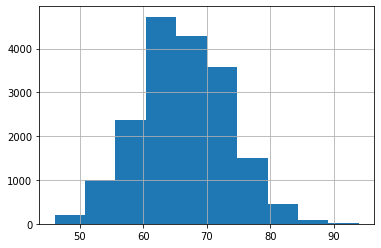

In [133]:
fifa_df['Overall'].hist(bins=10)

# Majority of the overall rating lie between 62 and 66

# Retrieve the names of top20 players based on the Overall rating. (2 points)

In [134]:
fifa_df.nlargest(20, ['Overall'])['Name']

0              L. Messi
1     Cristiano Ronaldo
2             Neymar Jr
3                De Gea
4          K. De Bruyne
5             E. Hazard
6             L. Modrić
7             L. Suárez
8          Sergio Ramos
9              J. Oblak
10       R. Lewandowski
11             T. Kroos
12             D. Godín
13          David Silva
14             N. Kanté
15            P. Dybala
16              H. Kane
17         A. Griezmann
18        M. ter Stegen
19          T. Courtois
Name: Name, dtype: object

#Generate a dataframe which should include all the information of the
#Top 20 players based on the Overall rating. (4 points)

In [135]:
fifa_top20=fifa_df.nlargest(20, ['Overall'])
fifa_top20

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,1.105e+08,565000,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,7.7e+07,405000,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,1.185e+08,290000,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,193080,De Gea,27,Spain,91,93,Manchester United,7.2e+07,260000,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,1.02e+08,355000,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,9.3e+07,340000,Right,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100000.0
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,6.7e+07,420000,Right,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137400000.0
7,176580,L. Suárez,31,Uruguay,91,91,FC Barcelona,8e+07,455000,Right,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,164000000.0
8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,5.1e+07,380000,Right,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104600000.0
9,200389,J. Oblak,25,Slovenia,90,93,Atlético Madrid,6.8e+07,94000,Right,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,144500000.0


#13. What is the average "Age" and "Wage" of these top 20 players? (use
#the data frame created in the question 11) (2 points)

In [136]:
# average age
fifa_top20['Age'].mean()

28.3

In [137]:
#average wage
fifa_top20['Wage'].mean()
#289.7K

289700.0

#14.Among the top 20 players based on the Overall rating, which player has
#the highest wage? Display the name of the player with his wage. (2 points)

In [138]:
maxWage = fifa_top20['Wage'].max()
fifa_top20[fifa_top20['Wage']==maxWage]['Name']
# L. Messi

0    L. Messi
Name: Name, dtype: object

#15.Generate a dataframe which should include the "Player name", "Club
#Name", "Wage", and 'Overall rating'. (4 Points)
#- i) find the average Overall rating for each club.
#- ii) Display the average overall rating of Top10 Clubs using a plot

In [139]:
fifa_df_subset=fifa_df[['Name','Club','Wage','Overall']]

In [140]:
#average rating for each club
fifa_df_subset.groupby(['Club'])['Overall'].agg('mean')

Club
 SSV Jahn Regensburg        65.586207
1. FC Heidenheim 1846       65.750000
1. FC Kaiserslautern        63.384615
1. FC Köln                  70.785714
1. FC Magdeburg             65.615385
1. FC Nürnberg              68.827586
1. FC Union Berlin          68.321429
1. FSV Mainz 05             70.843750
AC Ajaccio                  65.043478
AC Horsens                  60.640000
AD Alcorcón                 67.413793
ADO Den Haag                66.678571
AEK Athens                  70.214286
AFC Wimbledon               60.461538
AIK                         65.074074
AJ Auxerre                  66.296296
AS Béziers                  62.038462
AS Monaco                   67.912409
AS Nancy Lorraine           64.666667
AS Saint-Étienne            70.875000
AZ Alkmaar                  70.000000
Aalborg BK                  62.037037
Aarhus GF                   61.407407
Aberdeen                    64.333333
Accrington Stanley          61.178571
Adelaide United             61.400000
Ajax   

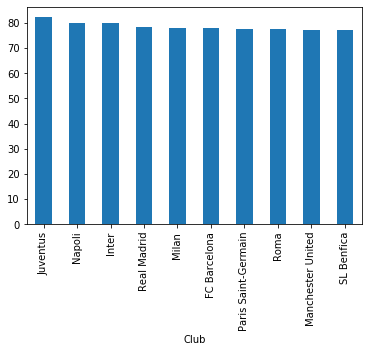

In [141]:
fifa_df_avg=fifa_df_subset.groupby(['Club'])['Overall'].agg('mean').sort_values(ascending=False).head(10)
fifa_df_avg.plot.bar()



#16. What is the relationship between age and individual potential of the
#player? Visualize the relationship with appropriate plot and Comment on
#the same. (2 points)

In [142]:
fifa_df['Age'].corr(fifa_df['Potential'])

-0.2533121074109557

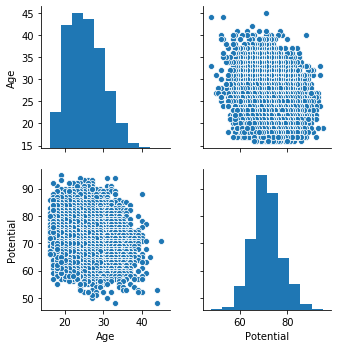

In [143]:
sns.pairplot(fifa_df[['Age','Potential']])

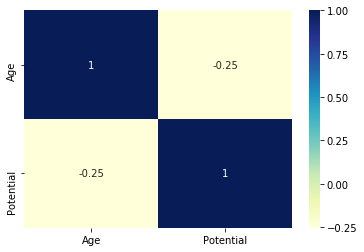

In [144]:
sns.heatmap(fifa_df[['Age','Potential']].corr(), cmap="YlGnBu", annot=True)

# There is negative correlation between age and potential

#17. Which features directly contribute to the wages of the players?
#Support your answer with a plot and a metric. (2 points) (hint: use
#potential, Overall, value, international reputation, and Release Clause)

#18. Find the position in the pitch where the maximum number of players
#play and the position where the minimum number of players play? Display
#it using a plot. (2 points)

In [123]:
fifa_df.groupby(["Position"])['Position'].count().sort_values(ascending=False)

Position
ST     2152
GK     2025
CB     1778
CM     1394
LB     1322
RB     1291
RM     1124
LM     1095
CAM     958
CDM     948
RCB     662
LCB     648
LCM     395
RCM     391
LW      381
RW      370
RDM     248
LDM     243
LS      207
RS      203
RWB      87
LWB      78
CF       74
RAM      21
LAM      21
RF       16
LF       15
Name: Position, dtype: int64

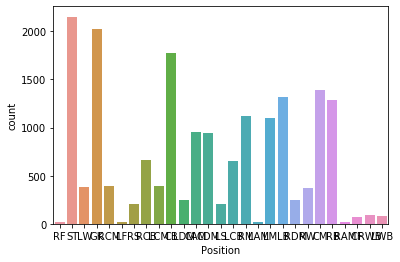

In [124]:
sns.countplot(x="Position", data=fifa_df)

# ST position has the max number of players 2152

#19. How many players are from the club 'Juventus' and the wage is greater
#than 200K? Display all the information of such players. (2 points)

In [155]:
fifa_df_juv=fifa_df[fifa_df['Club']=='Juventus' ]
fifa_df_juv[fifa_df_juv['Wage']>200000]
# 3 players

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,7.7e+07,405000,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
15,211110,P. Dybala,24,Argentina,89,94,Juventus,8.9e+07,205000,Left,...,84.0,23.0,20.0,20.0,5.0,4.0,4.0,5.0,8.0,153500000.0
24,138956,G. Chiellini,33,Italy,89,89,Juventus,2.7e+07,215000,Left,...,84.0,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0,44600000.0


In [156]:
fifa_df_juv[fifa_df_juv['Wage']>200000]['Name'].count()

3

#20. Generate a data frame containing top 5 players by Overall rating for
#each unique position. (2 Points)

In [167]:
fifa_df_pos_5 = fifa_df.groupby(['Position']).apply(lambda x: x.nlargest(5,['Overall'])).reset_index(drop=True)

In [168]:
fifa_df_pos_5

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,194765,A. Griezmann,27,France,89,90,Atlético Madrid,7.8e+07,145000,Left,...,87.0,59.0,47.0,48.0,14.0,8.0,14.0,13.0,14.0,165800000.0
1,190460,C. Eriksen,26,Denmark,88,91,Tottenham Hotspur,7.35e+07,205000,Right,...,88.0,59.0,57.0,22.0,9.0,14.0,7.0,7.0,6.0,141500000.0
2,201942,Roberto Firmino,26,Brazil,86,87,Liverpool,5.3e+07,195000,Right,...,87.0,60.0,64.0,42.0,8.0,11.0,9.0,6.0,10.0,104700000.0
3,189596,T. Müller,28,Germany,86,86,FC Bayern München,4.5e+07,135000,Right,...,83.0,44.0,41.0,44.0,6.0,7.0,11.0,14.0,14.0,74300000.0
4,176635,M. Özil,29,Germany,86,86,Arsenal,4.35e+07,190000,Left,...,82.0,24.0,16.0,19.0,6.0,14.0,10.0,6.0,14.0,82700000.0
5,182493,D. Godín,32,Uruguay,90,90,Atlético Madrid,4.4e+07,125000,Right,...,82.0,90.0,89.0,89.0,6.0,8.0,15.0,5.0,15.0,90200000.0
6,205600,S. Umtiti,24,France,87,92,FC Barcelona,5.7e+07,205000,Left,...,82.0,90.0,89.0,86.0,15.0,10.0,14.0,12.0,15.0,121100000.0
7,177509,M. Benatia,31,Morocco,86,86,Juventus,3e+07,160000,Right,...,82.0,89.0,87.0,85.0,7.0,4.0,8.0,7.0,11.0,49500000.0
8,192366,N. Otamendi,30,Argentina,85,85,Manchester City,2.85e+07,170000,Right,...,80.0,83.0,85.0,84.0,12.0,5.0,8.0,11.0,12.0,52700000.0
9,171919,Naldo,35,Brazil,85,85,FC Schalke 04,9e+06,38000,Right,...,84.0,86.0,88.0,85.0,14.0,10.0,14.0,8.0,14.0,15300000.0


#21. What is the average wage one can expect to pay for the top 5 players
#in every position? (use the data frame created in Q19) (2 points)

In [175]:
fifa_df_pos_5.groupby('Position').apply(np.mean).reset_index()[['Position','Wage']]

,Position,Wage
0,CAM,174000.0
1,CB,139600.0
2,CDM,217000.0
3,CF,47400.0
4,CM,130600.0
5,GK,192800.0
6,LAM,81600.0
7,LB,177200.0
8,LCB,162000.0
9,LCM,184400.0
